# Monte Carlo y la integral de camino de Feynman

# 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


D1 = 30 #cm
D2 = 30 #cm
A = 0.1 #cm
a = 0.01 #cm
d = 0.09 #cm

lambda_ = 6.7e-5 #cm
N = 10000
z = np.linspace(-0.4, 0.4, 1000)

In [ ]:
def monte_carlo(z):
    x = np.random.uniform(-A / 2, A / 2, N)
    y = np.random.uniform(d/2-(a/2), d/2 +(a/2), N)
    y1 = np.random.choice([-1,1],N)
    y*=y1
    p_1 = np.exp((2 * np.pi * 1j / lambda_) * (D1 + D2)) * \
        np.exp((1j * np.pi / (lambda_ * D1)) * ((x - y) ** 2)) * \
        np.exp((1j * np.pi / (lambda_ * D1)) * ((z - y) ** 2))
    integral = np.abs(np.sum(p_1)/N)** 2
    return integral

intensidad = np.array([])
for i in z:
    intensidad=np.append(intensidad, monte_carlo(i))

In [ ]:
## Clasico
def modelo_clasico(z):
    theta = np.arctan((z/10)/D2)
    a = np.cos(np.pi * d / lambda_ * np.sin(theta)) ** 2
    b = np.sinc(a / lambda_ * np.sin(theta)) ** 2
    return a * b



intensidad_clasica = modelo_clasico(z)
intensidad_clasica /= np.max(intensidad_clasica)


In [ ]:
## Normalizar ambos modelos

intensidad/= np.max(intensidad)
intensidad_clasica /= np.max(intensidad_clasica)

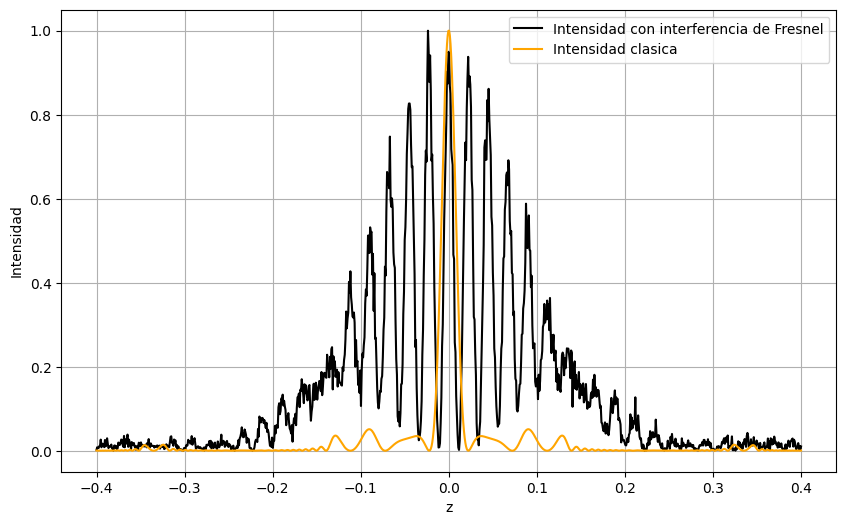

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(z, intensidad, label="Intensidad con interferencia de Fresnel", color='k')
plt.plot(z, intensidad_clasica, label="Intensidad clasica", color='orange')
plt.xlabel('z')
plt.ylabel('Intensidad')
plt.legend()
plt.grid()


In [ ]:

sigma = 3
N = 100000
initial_y = 0

def distribucion_target(y, x, z):
    phase_term = np.exp(1j * np.pi / lambda_ * ((x - y) ** 2 + (z - y) ** 2) / D1)
    return np.abs(phase_term) ** 2

# Metropolis-Hastings algorithm for sampling y
def metropolis_hastings(sigma, z, N):
  y0=0
  y_samples = [y0]

  for i in range(N):

      y_propuesto = np.random.normal(y0, sigma)

      x= np.random.uniform(-A / 2, A / 2)

      p_y0= distribucion_target(y0, x, z)
      p_propuesto = distribucion_target(y_propuesto, x, z)

      radio = min(1, p_propuesto / p_y0)

      u= np.random.uniform(0, 1)
      if u < radio:
        y_samples.append(y_propuesto)
        y0 = y_propuesto
      else:
          y_samples.append(y0)

  return np.array(y_samples)


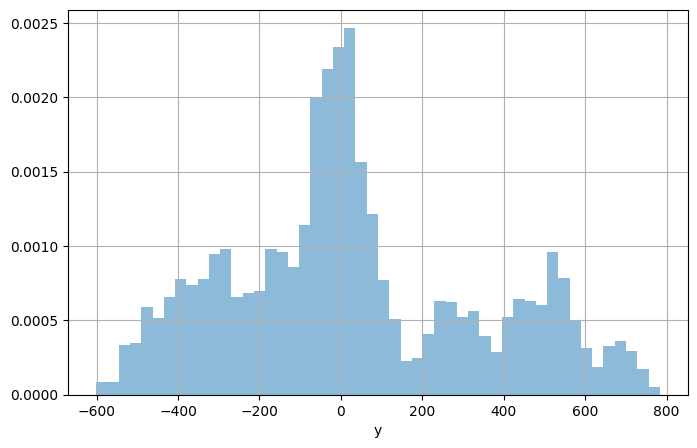

In [ ]:
z_value =0.1
y_samples_metropolis = metropolis_hastings( sigma, z_value, N)

plt.figure(figsize=(8, 5))
plt.hist(y_samples_metropolis, bins=50, density=True, alpha=0.5)
plt.xlabel('y')
plt.grid()
plt.show()

##2) Metrópolis-Hastings para muestrear distribuciones (1pt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
N=10000
alpha=2
beta=3

distribucion_target = lambda x: (x**(alpha - 1) * np.exp(-x / beta))


In [ ]:
def Metropolis_hasting(N,sigma):
    x_0=np.random.gamma(alpha,beta)
    muestras=np.zeros(N)
    muestras[0]=x_0
    for i in range(N):
        x_propuesto=np.random.normal(x_0,sigma)
        radio=min(1,distribucion_target(x_propuesto)/distribucion_target(x_0))

        u=np.random.uniform()

        if u <= radio:
            x_0=x_propuesto

        muestras[i]=x_0

    return muestras

In [ ]:
samples=Metropolis_hasting(N,3)

In [ ]:
x=np.linspace(0,20,1000)
distribucion_gamma=sc.stats.gamma(alpha,scale=beta).pdf(x)

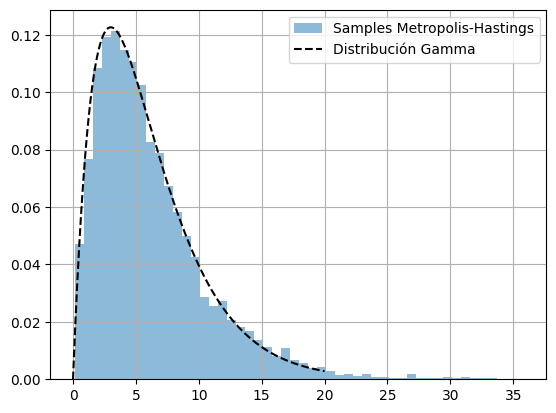

In [ ]:
# Comparacion con scipy.stats.gamma(alpha,scale=beta).pdf()
plt.hist(samples, density=True, alpha=0.5,bins=50,label="Samples Metropolis-Hastings")
plt.plot(x,distribucion_gamma, ls='--', color="k", lw=1.5, label='Distribución Gamma')
plt.legend()
plt.grid()

El gráfico muestra un histograma de las muestras generadas por Metropolis-Hastings (en azul) superpuesto con la distribución Gamma obtenida de scipy.stats. La alineación cercana entre ambas curvas implica que la implementación del algoritmo está funcionando, ya que genera muestras que coinciden con la distribución esperada.

In [ ]:

def estimacion_parametros(iteraciones, sigma):
    param_alpha=np.zeros(iteraciones)
    param_beta=np.zeros(iteraciones)
    for i in range(iteraciones):
        samples=Metropolis_hasting(N,sigma)
        alf,loc,bet=sc.stats.gamma.fit(samples)
        param_alpha[i]=alf
        param_beta[i]=bet
    return param_alpha,param_beta

In [ ]:
sigma=3
iteraciones=100
parametros_alpha,parametros_beta=estimacion_parametros(iteraciones, sigma)

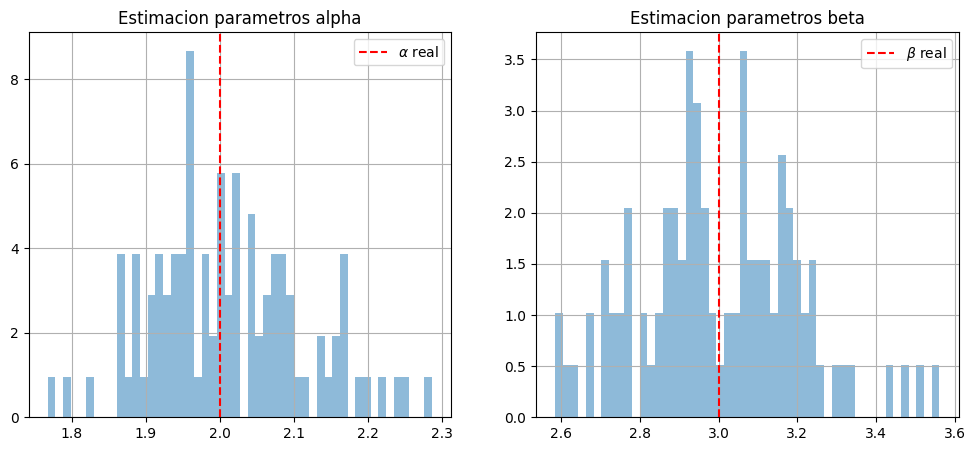

In [ ]:
fi,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].hist(parametros_alpha, density=True, alpha=0.5,bins=50)
ax[0].set_title("Estimacion parametros alpha")
ax[0].axvline(alpha,color="r",label="$\\alpha$ real",ls="--")


ax[1].hist(parametros_beta, density=True, alpha=0.5,bins=50)
ax[1].axvline(beta,color="r",label="$\\beta$ real",ls="--")
ax[1].set_title("Estimacion parametros beta")
for a in ax:
  a.grid()
  a.legend()

Los histogramas de α y β muestran la distribución de los valores estimados a lo largo de múltiples iteraciones. La mayoría de las estimaciones se agrupan alrededor de los valores reales de los parámetros, lo que sugiere que los picos de los histogramas están muy cerca de estos valores. Esto indica una buena precisión en las estimaciones.

2.3

Se observa que al cambiar el parámetro σ, se afecta la eficiencia del algoritmo. Con un σ muy pequeño, los parámetros no se estiman correctamente, ya que los valores propuestos serán muy cercanos al estado actual. Esto provoca una agrupación de las muestras en torno a un único valor, que no refleja la distribución real, generando una mala mezcla y alta autocorrelación. Por otro lado, con un σ muy grande, tampoco se estiman correctamente los parámetros, ya que las propuestas pueden ser muy diferentes del estado actual. Esto reduce la tasa de aceptación de las propuestas, ya que muchas de ellas serán rechazadas, lo que disminuye la cantidad de muestras aceptadas y hace el muestreo menos eficiente. En este caso, para σ=3, los resultados muestran que la estimación de α y β es casi precisa.

2.4

Al aumentar o disminuir el tamaño de la muestra
N, esto afecta la precisión y exactitud de las estimaciones de los parámetros. Con un N pequeño, las estimaciones de los parámetros tendrán más varianza y serán menos precisas, ya que el algoritmo no abarca suficientemente la distribución. Los histogramas de α y β se volverían más anchos, reflejando esta mayor incertidumbre. Por otro lado, con un N grande, las estimaciones de α y β convergerán más estrechamente a los valores reales, y los histogramas deberían volverse más estrechos, indicando una mayor precisión.

## 3) Modelo de Ising con Metrópolis-Hastings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def energia(sigma, J, N, i, j):

    i = i % N
    j = j % N
    ip = (i + 1) % N
    im = (i - 1) % N
    jp = (j + 1) % N
    jm = (j - 1) % N


    E = -J * sigma[i, j] * (sigma[ip, j] + sigma[im, j] + sigma[i, jp] + sigma[i, jm])

    return E

In [ ]:
def energia_vecinos(sigma, J, N,i,j):
  E=energia(sigma, J, N,i,j)+energia(sigma, J, N,i+1,j)+energia(sigma, J, N,i,j+1)+energia(sigma, J, N,i-1,j)\
  +energia(sigma, J, N,i,j-1)

  return E


In [ ]:
def Metropolis_Hastings_ising(x0,N,J,beta,iteraciones):

  for i in range(iteraciones):
      xp=x0.copy()

      ij=np.random.choice(N,2)
      i,j=ij[0],ij[1]
      E_old = energia_vecinos(x0,J,N,i,j)
      xp[i,j]*=(-1)
      E_new=energia_vecinos(xp,J,N,i,j)

      delta_E=E_new-E_old

      u=np.random.uniform()

      if delta_E<= 0 or u <= np.exp(-beta*delta_E):
          x0 = xp
          E_new = E_old
      else:
        xp = x0


  return x0

In [ ]:
N=150
J=0.2
beta=10

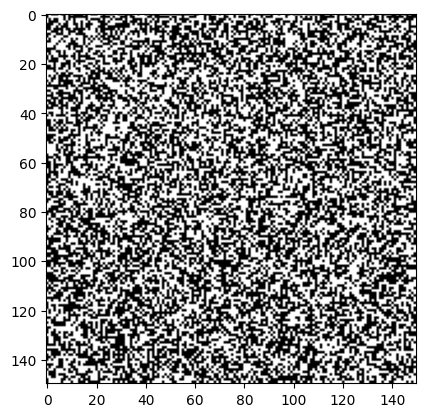

In [ ]:
import matplotlib.animation as animation

x0 = np.random.choice([-1,1],[N,N]) ## Inicializar sistema

fig = plt.figure()
im = plt.imshow(x0, cmap='gray')

def update(frame):
  global x0
  x0 = Metropolis_Hastings_ising(x0 , N, J, beta ,iteraciones=400)
  im.set_array(x0)
  return [im]

ani = animation.FuncAnimation(fig, update, frames=500, blit=True)

In [ ]:
ani.save("punto_3.mp4")

## 4) Generación de lenguaje natural con cadenas de Markov

## 4.1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pg1342-images.txt to pg1342-images.txt


In [ ]:
import pandas as pd
import re
import unicodedata
import numpy as np

with open("pg1342-images.txt", "r") as file:
    texto = file.read()
texto= texto.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n")


In [ ]:
texto =texto[29774+11:] ## Filtrar primera parte

texto=texto[:658160] ## Filtrar ultima parte

In [ ]:
texto = texto.replace('"', '').replace("'", '') #Comillas

texto=re.sub(r'[“àéêœ”’‘]', '', texto)

texto=re.sub(r'[1245689]', '', texto)
texto = texto.replace('_', '')

texto = re.sub(r' +', ' ', texto).strip()

In [115]:
texto=texto.lower()

## 4.2

In [ ]:
from tqdm import tqdm
def entrenamiento_modelo(n, texto, n_gramas, chars, N):

    F = pd.DataFrame(np.zeros([len(n_gramas), len(chars)]), dtype=int, index=n_gramas, columns=chars)

    for i in tqdm(range(N)):
        n_gram = texto[i:i+n]
        next_char = texto[i+n]
        if next_char in chars:
            F.loc[n_gram, next_char] += 1

    return F

In [ ]:
def generar_n_gramas(n, texto):
    return np.unique([texto[i:i+n] for i in range(len(texto) - n + 1)])
def aplicar(n):
  n_g=generar_n_gramas(n, texto)
  chr=sorted(set(texto))
  F=entrenamiento_modelo(n, texto, n_g, chr, N=len(texto)//2)
  return F

In [ ]:

def implementacion(F, n, texto, m=1500):

    chars = sorted(set(texto))
    n_gramas = generar_n_gramas(n, texto)



    P = F / F.sum(axis=1).values[:, None]


    saltos = list(F.index[F.index.str.startswith("\n")])
    frase = ""
    first_l = np.random.choice([x for x in n_gramas if x.startswith("\n")])
    print(first_l)

    frase += first_l

    for i in range(n, m):
        current_n_gram = frase[-n:]
        nueva_letra = np.random.choice(chars, p=P.loc[current_n_gram].values)
        frase += nueva_letra

    return frase


## 4.3

### n=1

In [ ]:
##n=1
F1=aplicar(1)
frase_n1=implementacion(F1, 1, texto)
print(frase_n1)

100%|██████████| 326914/326914 [01:29<00:00, 3646.66it/s]





me ouginandad ly chopy d h df pe ceche gons cadotsicaice ndadat paty hauchee hy shorlll saizass hat inowhein win akn theye, hlastsuse owicatenemorayofibjay ad cusapei n w dg hr ai incoulen n, id pemuar anchinef s tofed re of ancofoe m gr aninsa ades id wizes piva besthealed? mecas bonefth ce s weteang kht thowil as chinga corvered oplenginde ate saked tiochinle y at ithain lored wexcin sersmarof pa hey it onndverachabin meted aneng the blle he ting my d! dain walo nthand my halinerecoflerft calfayowar. ttam surn le hem, wast oply otare herf akitaingakhadera ad o llixtuthestseremy aved camualcatofid te enking, be, hillin maly ind a ling par, m wi imo sed hisore, sacanethe f d m trlinvenetit aspege d ang; t qucamefre. s ffo insphequpeconthagecaw o fuchasexppobok ordeteawa habes at s e outh m roul teroutis! it heamind bars minowhalencon, terd chewinn tours, inte ytou. t.
e bed a whay can tou day sh lired t aser vet chie wh h tidy gha t hallians.
min vecat beangh o at fanshedea ncoroo t

### n=2

In [ ]:
## n=2
F2=aplicar(2)
frase_n2=implementacion(F2, 2, texto)
print(frase_n2)

100%|██████████| 326914/326914 [00:52<00:00, 6266.71it/s]



r

really wast ithe ders carch i a she slied to anew hatty. ced no somform thery wall, i whould binioul con caseve els ather evedgmer i coss, beecticurcying, abould i been a quallon, sur prome entern bet asturne, i don.]

youre over, as by all—andes but? yestid rottly forkable mil comen us tookinay, as bet muce noth a jon tharcy ofuld mr. weve collimmakinued, fat criess day knere feat iss was mr.

ch hat oftens man thand toon appossuppyrith. mucaut no elis such se ented aneyesonly a bet be musen hurn; be vereave goom, have and hey way.

iturre mr. cons. me loons thou cof ans wom ver prold she or med, dided womently; ford but she reaved the bend bee, ither t mucholottlenceire his, be. on solds and deelizabeavourell an an chure forls, ink well bough, the am man diester thean to welizzy not youlle anden thot braid orty amorresont arld shenicturhaver pre, whis ve ad this obsedly sublen to im as muspen to ing, beflagetterhandnet, obaccas pow ge. he sualt whostaks las of thing thaten mily n

### n=4

In [ ]:
## n=4
F4=aplicar(4)
frase_n4=implementacion(F4, 4, texto)
print(frase_n4)

100%|██████████| 326914/326914 [00:52<00:00, 6228.93it/s]



col

colonel fitzwill be that i entreat desire and whenever, and that the day. elizabeth, by mr. benness of it relately to assure from a cards bring, while however, i regularly any symmetry agree or whom it a week speak, and she was taking in love was of pleasure overy much of dance what he same to great privility of it. it neighbourgh as said care, was on the secure of. as lodging his absolution, and his is circle attorney were could not be a very relieve, the saw elizabeth:—

you are same strong excited by january.

miss be the was not your nether in my politeness. your estatest of temployments, that the has me instruck her would between many both contemper, was and your know interruption so london of my after one or which as a voluntary to make in and respectable and elizabeth. good-looked he honoured her expresent; forgotte changer sir, was not go, and, entirely awed him, almost intimationed the so untidy, afterward sorry ill-breeding! cried.

miss lucas.

no—i can in seasonage; a

### n=5

In [ ]:
## n=5
F5=aplicar(5)
frase_n5=implementacion(F5, 5, texto)
print(frase_n5)

100%|██████████| 326914/326914 [00:52<00:00, 6255.38it/s]




 my


 my dear jane had the others, who has been the does not promised that these world, he with other he day, as your language.

the could have the amount of independency run away.

i have to obliged too pleased, sooner satisfaction for me to longed. the could not in her to me a little your understand make they stocking! cried how wonderfulness, you know where was scarcely and convinced whenever seeing near than many family serious and my sister a low voice, whether. it will not, for one of her friend who see no reading.

not acquainted wickhams all humour accepted them very seriously. a man in prevent of the trouble of all they read their opinion to bed, i hopes of the sight on the between at long; but the superlative here is being group; and, done, the seems like herself.

this wished at they before the hospitality of health of universities, his friendship said was well, cried her own with were of polite ration gave his humble prospected very duties, however, very sweet round miss

### n=6

In [82]:
## n=6
F6=aplicar(6)
frase_n6=implementacion(F6, 6, texto)
print(frase_n6)

100%|██████████| 326914/326914 [00:59<00:00, 5537.39it/s]



but j

but jane; and, the walk of the match might by george wickham, that i regret what a silence. if she is a joke.

certainly. i am very day fortune to know it.

the wedding to the other behaviour. the winter, might stay a months ablution of seeing, and gave another was pleasantly engaged in her awful object. he once or two estate to not been also, if the advise you will not explained of his house by the study?

that way. i am, to enter it; and seemed pleasure of his book, and the day before.

their mouths exceedingly trouble? young ladies of lady lucas withdrew; determined of one of that about. he only twenty-seven, was admire.

oh, charlottes domestic concern there?

design,—to take care of quadrille in her.

this intimate, continued, is going their cousin, for she was talks of threatened to elizabeth.

you down before her turn to be surprised at thing else to do, and lover, she shops and elevated refused him now.

they had, without anger of the two eldest of mr. darcy could presu

### n=8

In [80]:
## n=8
F8=aplicar(8)
frase_n8=implementacion(F8, 8, texto)
print(frase_n8)

100%|██████████| 326914/326914 [00:53<00:00, 6103.19it/s]



the res

the rest of the room.

colonel fitzwilliams manner, from the day before the conquest of some one or other nephew; till the morning, that i have been a clerk to their kindness; or me either, for complying with her than his asking him the country that they scarcely spoke with a strong objections which a marriage was no more than once observation that he had even vouchsafed to suggested, his attachment.

to mr. darcy walked to me that. tease himself, instead of being the memory with a most intimate acquaintance is not another table, but knew not whether her release from his amiable in a private intelligence. on the entail away an estate after morning with her that you will not have something in his express her contempt seemed to justify her. mr. hurst and miss lucas, does not justify her. mrs. bennet he acknowledge of her, for she had expected to be particularly to her, especially when an answer to heighten her cousin, and she watched, and, after a pause of it.

yes; i do compre

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving words_alpha.txt to words_alpha.txt


In [125]:
with open('words_alpha.txt', 'r') as file:
    palabras_ingles = set(file.read().splitlines())

def porcentaje_palabras_reconocidas(texto, palabras_ingles):
    palabras_generadas = re.findall(r'\b\w+\b', texto)
    palabras_validas = [palabra for palabra in palabras_generadas if palabra in palabras_ingles]

    return len(palabras_validas) / len(palabras_generadas) * 100 if palabras_generadas else 0


Porcentaje de palabras en inglés

n=1

In [129]:
porcentaje_palabras_reconocidas(frase_n1,palabras_ingles)

49.42084942084942

n=2

In [130]:
porcentaje_palabras_reconocidas(frase_n2,palabras_ingles)

60.0

n=4

In [131]:
porcentaje_palabras_reconocidas(frase_n4, palabras_ingles)

90.70631970260223

n=6

In [132]:
porcentaje_palabras_reconocidas(frase_n6, palabras_ingles)

98.55072463768117

n=8

In [133]:
porcentaje_palabras_reconocidas(frase_n8,palabras_ingles)

98.88059701492537


¿Cuál es el mínimo $n$ que usted considera necesario para producir algo más o menos legible?

Un mínimo n en este caso podría ser a partir de n=6. Desde este punto, se evidencian palabras un poco más coherentes y concordantes. Las frases, a pesar de que carecen de cierto sentido, tienen un poco más de lógica que las anteriores

¿qué pasos habría que seguir para que este modelo pudiera mantener
una conversación, o producir frases gramaticalmente correctas?

Se podría incrementar el valor de n o utilizar un contexto más amplio. Otra alternativa, sería implementar una red neuronal, ya que es un modelo más avanzado capaz de aprender patrones lingüísticos más complejos y retener información de contextos más extensos. Para ello, la red necesitaría ser entrenada con las reglas gramaticales (incorporando las normas en el modelo) y con ejemplos de diálogos, de manera que luego pueda reproducirlos correctamente.

## 5) Evolución temporal de procesos estocásticos discretos

## 5.1

In [13]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constantes
A = 1000
B = 20
t_media_U = 23.4 / (60 * 24)  # Vida media de U239 en días
t_media_Np = 2.36  # Vida media de Np239 en días
lambda_U = np.log(2) / t_media_U
lambda_Np = np.log(2) / t_media_Np


def sistema_determinista(t,Y):
    U, Np, Pu = Y
    dU_dt = A - lambda_U * U
    dNp_dt = lambda_U * U - lambda_Np * Np
    dPu_dt = lambda_Np * Np - B * Pu
    return [dU_dt, dNp_dt, dPu_dt]

def derivada_central(f,t):
  N=len(f)
  d_f=np.zeros(N)
  for i in range(N):
    ip= (i+1) % N
    im = (i-1) % N
    h=abs(t[i]-t[ip])
    d_f[i] = (f[ip]-f[im])/2*h
  return d_f

In [14]:
umbral = 1e-2
tiempo=None

sol = solve_ivp(sistema_determinista, t_span=(0, 30), y0=[0,0,0],max_step=1e-2)
U_determinista=sol.y[0]
Np_determinista=sol.y[1]
Pu_determinista=sol.y[2]
t_determinista=sol.t

In [15]:
d_U= derivada_central(sol.y[0],sol.t)
d_Np=derivada_central(sol.y[1],sol.t)
d_Pu=derivada_central(sol.y[2],sol.t)

for i in range(len(d_U)):
  if abs(d_U[i]) <= umbral and abs(d_Np[i]) <= umbral and abs(d_Pu[i]) <= umbral:
    tiempo=sol.t[i]
    break

tiempo

9.999999999999999e-05

## 5.2 a

In [16]:
def Sistema_estocastico(t_simulacion):
    U, Np, Pu = 0, 0, 0
    Y_old = np.array([U, Np, Pu])
    t_old = 0
    times = [t_old]
    Y_t=[Y_old]
    R= np.array([[1,0,0],
                 [-1,1,0],
                 [0,-1,1],
                 [0,0,-1]])

    while t_old < t_simulacion:
      tasas=np.array([A, Y_old[0] * lambda_U, Y_old[1] * lambda_Np, Y_old[2] * B])
      tasa_total=tasas.sum()

      if tasa_total == 0:
        break
      tau = np.random.exponential(1 / tasa_total)

      r = np.random.choice(np.arange(len(R)), p=tasas / tasa_total)

      tau = np.random.exponential(1 / tasa_total)

      Y_new = Y_old + R[r]

      t_new = t_old + tau


      times.append(t_new)

      Y_t.append(Y_new.copy())

      Y_old = Y_new

      t_old = t_new


    return np.array(Y_t), times

In [17]:
Y, time=Sistema_estocastico(30)

In [18]:
U_estocastico=Y[:,0]
Np_estocastico= Y[:,1]
Pu_estocastico= Y[:,2]

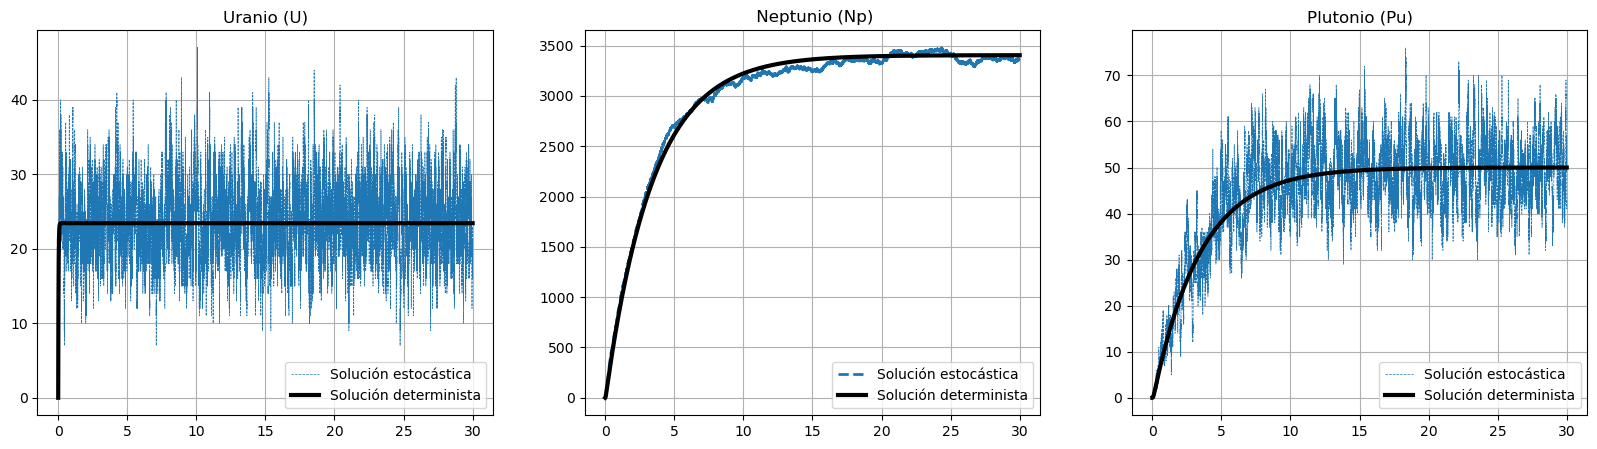

In [45]:
#Grafica
fig,axs =plt.subplots(1,3,figsize=(20,5))

axs[0].plot(time,U_estocastico, label='Solución estocástica', lw=0.5, ls="--")
axs[0].set_title("Uranio (U)")
axs[1].plot(time,Np_estocastico,label='Solución estocástica', lw=2, ls="--")
axs[1].set_title(" Neptunio (Np)")
axs[2].plot(time,Pu_estocastico, label='Solución estocástica ', lw=0.5, ls="--")
axs[2].set_title("Plutonio (Pu)")


axs[0].plot(sol.t,U_determinista, label='Solución determinista', color='k', lw=3)
axs[1].plot(sol.t,Np_determinista, label='Solución determinista', color='k', lw=3)
axs[2].plot(sol.t,Pu_determinista, label='Solución determinista', color='k', lw=3)

for a in axs:
  a.grid()
  a.legend()


## 5.2 b

In [ ]:
simulaciones = 100
Pu_prob = 80
Pu_c = []
for i in tqdm(range(simulaciones)):
  Y,t=Sistema_estocastico(40)
  Pu=Y[:,2]
  Pu_c.append(max(Pu) >= Pu_prob)
probabilidad_80 = np.mean(Pu_c)


100%|██████████| 100/100 [11:57<00:00,  7.17s/it]


In [ ]:
probabilidad_80

0.18

La probabilidad de que el nivel de Plutonio llegue a ser
igual o mayor a 80 es de 0.18